<a href="https://colab.research.google.com/github/freirepablo/Deep-Learning/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers, models, optimizers
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Treino'
test_path = '/content/drive/MyDrive/Dataset/Validação'

In [ ]:
batch_size = 32
img_size = (224, 224)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3050 images belonging to 8 classes.
Found 700 images belonging to 8 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.output
base_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/Treino/*')
print(len(folders))

8


In [ ]:
  x = Flatten()(base_model.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=35,  # ajuste conforme necessário
                    validation_data=test_generator)

Epoch 1/35
48/48 [==============================] - 1552s 32s/step - loss: 1.3320 - accuracy: 0.8652 - val_loss: 0.4367 - val_accuracy: 0.9614
Epoch 2/35
48/48 [==============================] - 49s 1s/step - loss: 0.4291 - accuracy: 0.9544 - val_loss: 0.4496 - val_accuracy: 0.9557
Epoch 3/35
48/48 [==============================] - 50s 1s/step - loss: 0.3000 - accuracy: 0.9662 - val_loss: 0.3546 - val_accuracy: 0.9629
Epoch 4/35
48/48 [==============================] - 49s 1s/step - loss: 0.2667 - accuracy: 0.9764 - val_loss: 0.5324 - val_accuracy: 0.9600
Epoch 5/35
48/48 [==============================] - 49s 1s/step - loss: 0.2782 - accuracy: 0.9744 - val_loss: 0.2873 - val_accuracy: 0.9714
Epoch 6/35
48/48 [==============================] - 48s 1s/step - loss: 0.2530 - accuracy: 0.9790 - val_loss: 0.2677 - val_accuracy: 0.9743
Epoch 7/35
48/48 [==============================] - 50s 1s/step - loss: 0.2267 - accuracy: 0.9810 - val_loss: 0.2445 - val_accuracy: 0.9771
Epoch 8/35
48/48 

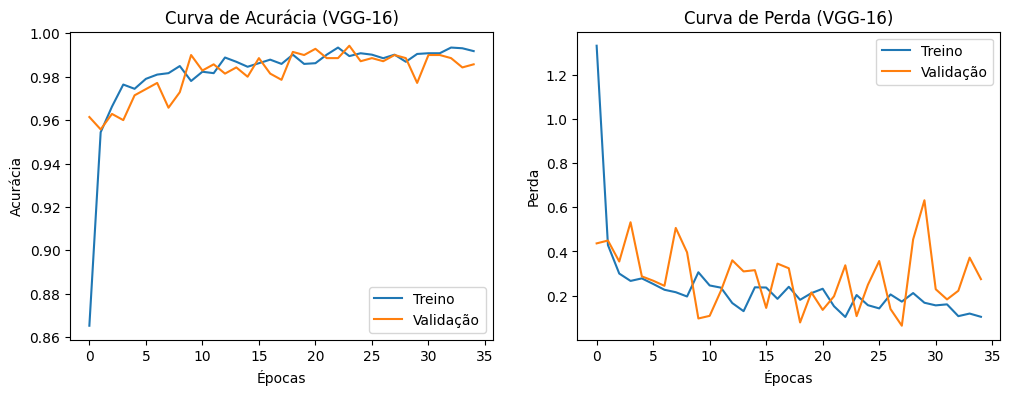

In [ ]:
# Plote as curvas de treino e teste
plt.figure(figsize=(12, 4))

# Plot da Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia (VGG-16)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot da Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (VGG-16)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Modelos_Treinados_2/vgg16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Carregue seu modelo treinado
model = keras.models.load_model('/content/drive/MyDrive/Modelos_Treinados_2/vgg16_model.h5')

# Defina uma lista de rótulos de doenças na ordem correta
labels = ['Antracnose', 'Cancro Bacteriano', 'Gorgulho da Manga', 'Mofo Fuliginoso', 'Morte Descendente', 'Mosca das Galhas', 'Oidio', 'Saudavel']

# Pasta que contém as imagens
pasta_raiz = '/content/drive/MyDrive/Dataset/Teste'

y_true = []  # Rótulos verdadeiros
y_pred = []  # Rótulos previstos

# Percorra todas as imagens na pasta
for pasta in os.listdir(pasta_raiz):
    pasta_path = os.path.join(pasta_raiz, pasta)
    if os.path.isdir(pasta_path):
        for imagem_nome in os.listdir(pasta_path):
            imagem_path = os.path.join(pasta_path, imagem_nome)
            if imagem_nome.endswith(('.jpg', '.jpeg', '.png')):  # Certifique-se de que seja um arquivo de imagem
                imagem = cv2.imread(imagem_path)
                imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converta para o formato RGB se necessário
                imagem = cv2.resize(imagem, (224, 224))  # Redimensione para o tamanho esperado pelo modelo
                imagem = np.expand_dims(imagem, axis=0)  # Adicione uma dimensão para a amostra única

                # Faça a predição
                predicao = model.predict(imagem)
                classe_predita = np.argmax(predicao)

                # Obtenha o rótulo da pasta (classe verdadeira)
                classe_verdadeira = labels.index(pasta)

                y_true.append(classe_verdadeira)
                y_pred.append(classe_predita)

# Crie a matriz de confusão
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plote a matriz de confusão não normalizada com valores absolutos
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_mtx, display_labels=labels).plot(include_values=True, cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - VGG-16')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Plote a matriz de confusão normalizada com percentuais
plt.figure(figsize=(10, 8))
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(confusion_mtx_normalized, display_labels=labels).plot(include_values=True, cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusão - VGG-16 (Normalizada)')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Exiba métricas de classificação
print(classification_report(y_true, y_pred, target_names=labels))

1/1 [==============================] - 0s 18ms/step
